In [2]:
import librosa

In [3]:
librosa.__version__

'0.7.0'

In [4]:
librosa.reassigned_spectrogram

<function librosa.core.spectrum.reassigned_spectrogram(y, sr=22050, S=None, n_fft=2048, hop_length=None, win_length=None, window='hann', center=True, reassign_frequencies=True, reassign_times=True, ref_power=1e-06, fill_nan=False, clip=True, dtype=<class 'numpy.complex64'>, pad_mode='reflect')>

In [5]:
%load_ext autoreload
%autoreload 2

In [6]:
import matplotlib.pyplot as plt
from avgn.utils.audio import load_wav
from avgn.signalprocessing.filtering import butter_bandpass_filter

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [7]:
figsize = (30,5)

In [8]:
import librosa

In [9]:
wav_dict = {
    'starling': '/mnt/cube/Datasets/starling_zenodo/b1160/wavs/2017-11-17_17-11-06-610000.wav',
    'mouse': '/mnt/cube/Datasets/mouse_usv/VOC592/VOC592_VOC571_SONG_CMPA_9_20_2016_56_24.52.WAV',
    #'canary': '/mnt/cube/Datasets/canary/FromYarden2018/bird_3/bird3_0244_2004_03_14_14_15.wav',
    'canary': '/mnt/cube/Datasets/canary/FromYarden2018/bird_1/bird1_0001_2004_03_05_18_14.wav',
    'bengalese_finch': '/mnt/cube/tsainbur/Projects/github_repos/avgn_paper/data/processed/bengalese_finch_sober/2019-09-02_17-08-52/WAV/or60yw70_300912_2036.4169.WAV'
}

In [10]:
wav_loc = wav_dict['canary']
#'/mnt/cube/Datasets/starling_zenodo/b1160/wavs/2017-11-17_17-11-06-610000.wav'

In [11]:
rate, data = load_wav(wav_loc)
#data = data[rate*20:rate*30]

In [12]:
rate/2-1

23999.0

In [13]:
data = butter_bandpass_filter(data, 500.0, rate/2-1, rate, order=2)

In [14]:
len(data)/rate

17.694041666666667

In [15]:
#data = data[rate*5:rate*10]

In [16]:
len(data)/rate

17.694041666666667

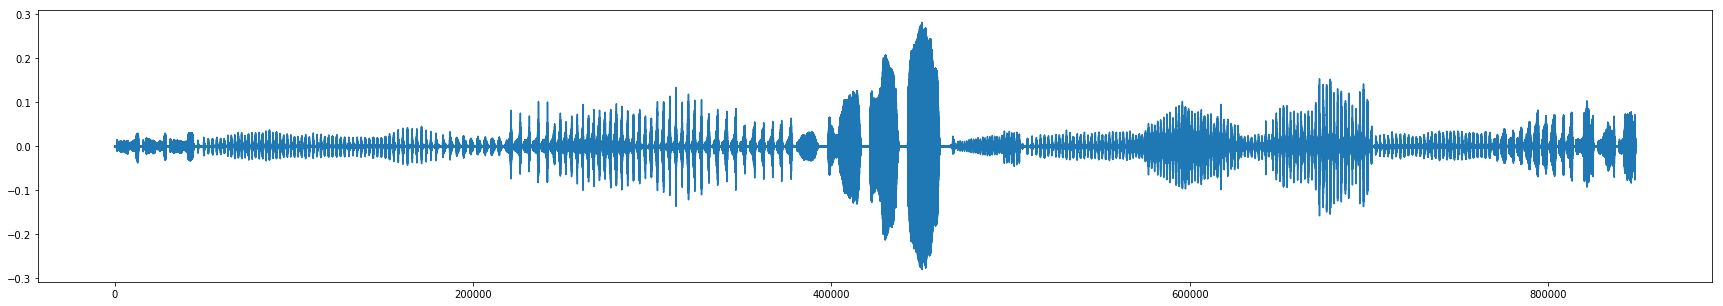

In [17]:
fig, ax = plt.subplots(figsize=figsize)
ax.plot(data)

In [18]:
from avgn.visualization.spectrogram import plot_spec


In [19]:
import numpy as np

In [97]:
freqs, times, mags = librosa.reassigned_spectrogram(
        y=data[:rate*2],
        sr=rate,
        n_fft=512,
        hop_length=128,
        center=False,
        fill_nan=False
    )

In [103]:
hparams.n_fft

512

In [104]:
int(hparams.hop_length_ms / 1000 * rate)

144

In [113]:
freqs, times, mags = librosa.reassigned_spectrogram(
    y=data[:rate*3],
    sr=rate,
    n_fft=hparams.n_fft,
    hop_length=int(hparams.hop_length_ms / 1000 * rate),
    win_length=int(hparams.win_length_ms / 1000 * rate),
    #fill_nan=True,
    ref_power=1e-4,
)

In [114]:
np.shape(reqs), np.shape(times), np.shape(mags)

((257, 3747), (257, 1001), (257, 1001))

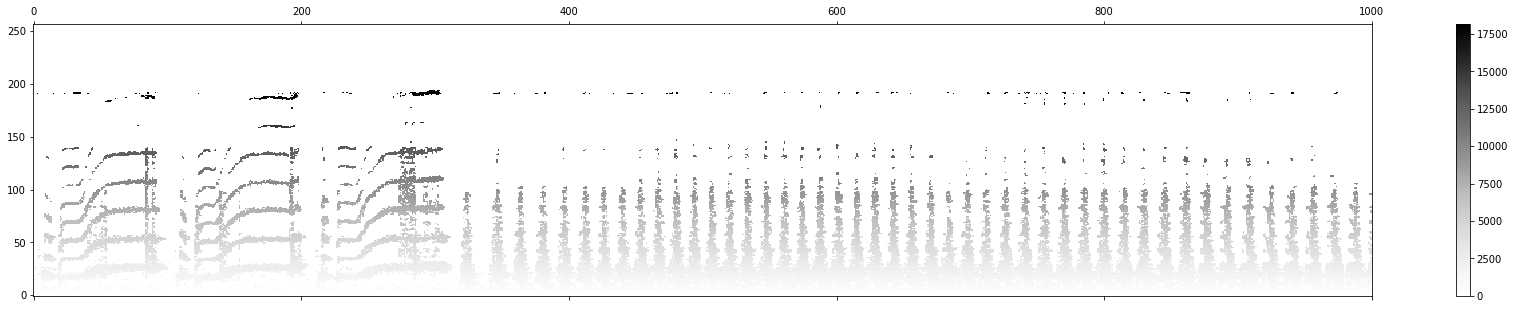

In [115]:
fig, ax = plt.subplots(figsize=figsize)
plot_spec(freqs, fig = fig, ax=ax, cmap = plt.cm.Greys);

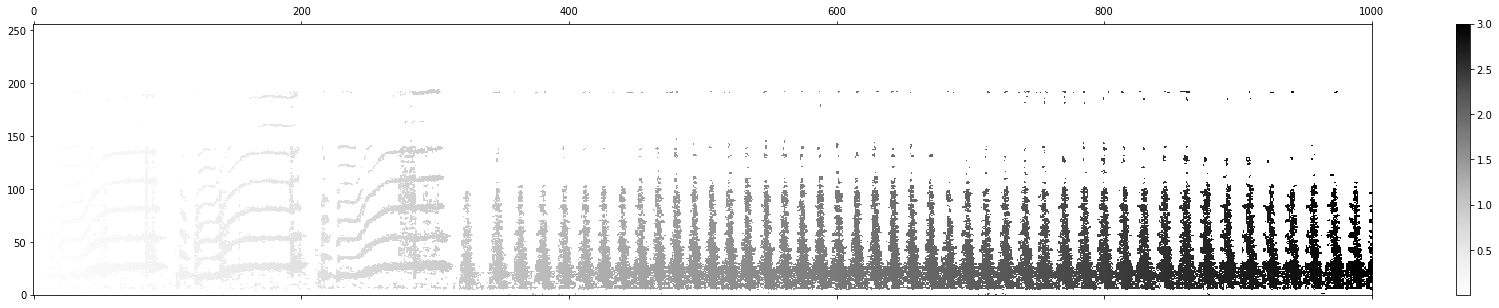

In [116]:
fig, ax = plt.subplots(figsize=figsize)
plot_spec(times, fig = fig, ax=ax, cmap = plt.cm.Greys);

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


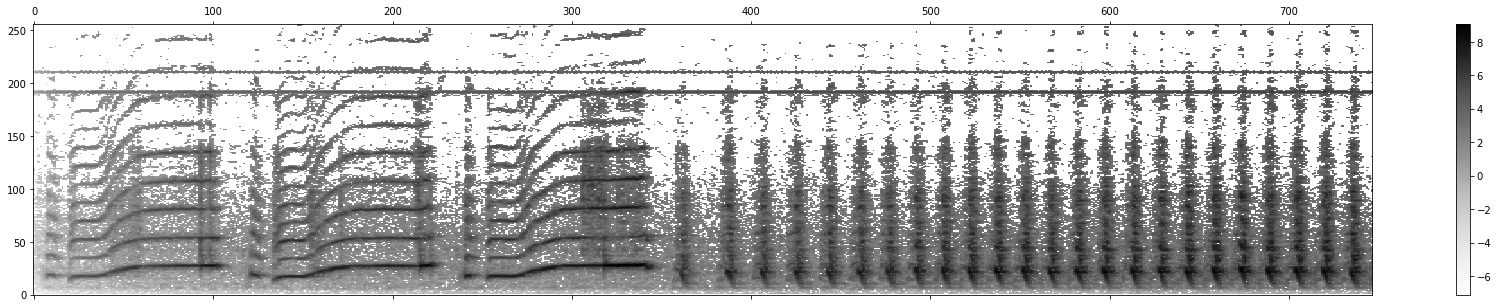

In [101]:
fig, ax = plt.subplots(figsize=figsize)
plot_spec(np.log(freqs*times*mags), fig = fig, ax=ax, cmap = plt.cm.Greys);

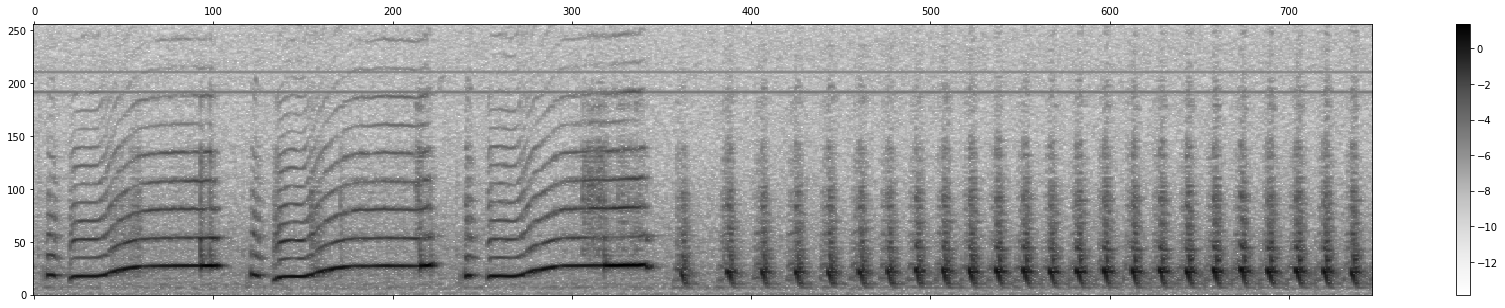

In [102]:
fig, ax = plt.subplots(figsize=figsize)
plot_spec(np.log(mags), fig = fig, ax=ax, cmap = plt.cm.Greys);

In [28]:
from avgn.utils.hparams import HParams

In [240]:
hparams = HParams(
    num_mel_bins = 32,
    n_fft = 2048,
    mel_lower_edge_hertz=500,
    mel_upper_edge_hertz=20000,
    butter_lowcut = 500,
    butter_highcut = 20000,
    ref_level_db = 20,
    min_level_db = -100,
    mask_spec = True,
    win_length_ms = 10,
    hop_length_ms = 3,
    mask_spec_kwargs = {"spec_thresh": 0.9, "offset": 1e-10},
    n_jobs = -1,
    verbosity=1,
    nex = 20
)

In [241]:
from avgn.signalprocessing.spectrogramming import spectrogram, reassigned_spectrogram

In [242]:
spec = spectrogram(data[:rate*2], rate, hparams)
np.shape(spec)

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]


(1025, 667)

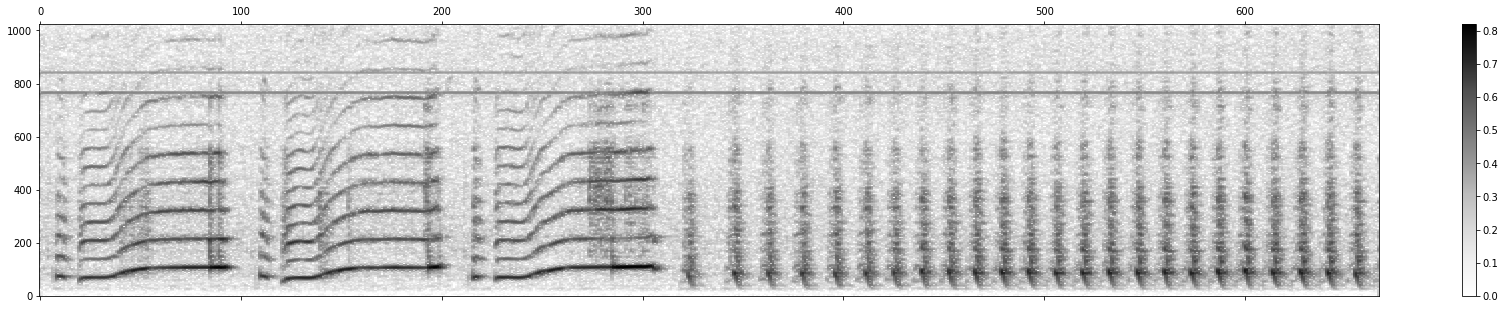

In [243]:
fig, ax = plt.subplots(figsize=figsize)
plot_spec(spec, fig = fig, ax=ax, cmap = plt.cm.Greys);

In [244]:
data

array([-1.54413879e-03, -1.51813306e-03, -1.25458518e-03, ...,
        2.80500621e-05,  5.04571189e-05,  3.96669067e-04])

/mnt/cube/tsainbur/Projects/github_repos/avgn_paper/avgn/signalprocessing/spectrogramming.py:38: RuntimeWarning: invalid value encountered in greater
  


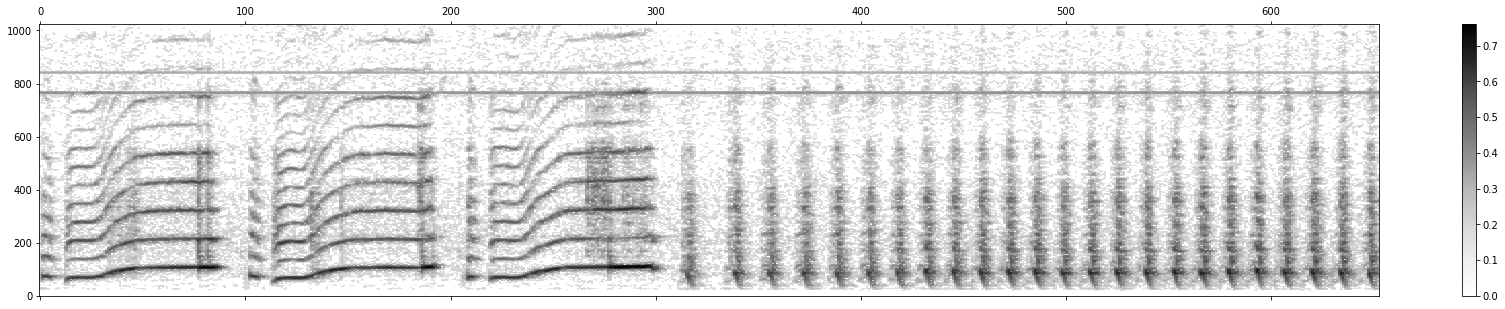

In [249]:
spec = reassigned_spectrogram(data[:rate*2], rate,  hparams)
np.shape(spec)

fig, ax = plt.subplots(figsize=figsize)
plot_spec(spec, fig = fig, ax=ax, cmap = plt.cm.Greys);

TypeError: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

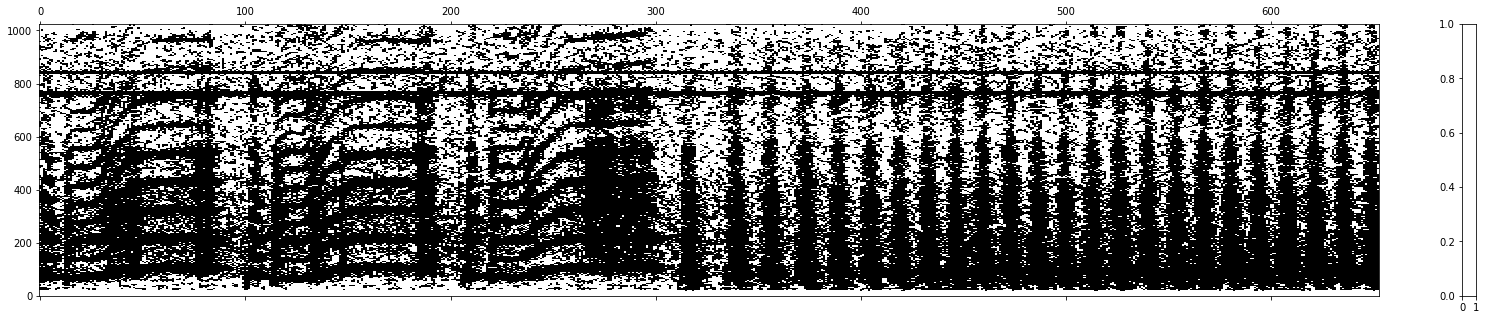

In [246]:
fig, ax = plt.subplots(figsize=figsize)
plot_spec(spec > 0, fig = fig, ax=ax, cmap = plt.cm.Greys);

In [ ]:
from librosa.display import specshow

In [250]:
??librosa.power_to_db

In [ ]:
amin = 1e-10
n_fft = 64
sr = 4000
y = 1e-3 * librosa.clicks(times=[0.3], sr=sr, click_duration=1.0,
                       click_freq=1200.0, length=8000) +\
 1e-3 * librosa.clicks(times=[1.5], sr=sr, click_duration=0.5,
                       click_freq=400.0, length=8000) +\
 1e-3 * librosa.chirp(200, 1600, sr=sr, duration=2.0) +\
 1e-6 * np.random.randn(2*sr)
freqs, times, mags = librosa.reassigned_spectrogram(y=y, sr=sr, n_fft=n_fft)
mags_db = librosa.power_to_db(mags, amin=amin)
background = np.zeros_like(mags) - 10*np.log10(amin)
ax = plt.subplot(2, 1, 1)
specshow(mags_db, x_axis="s", y_axis="linear", sr=sr,
                         hop_length=n_fft//4, cmap="gray_r")
plt.title("Spectrogram")
plt.tick_params(axis='x', labelbottom=False)
plt.xlabel("")
plt.subplot(2, 1, 2, sharex=ax)
specshow(background, x_axis="s", y_axis="linear",
                         cmap="gray_r", sr=sr, hop_length=n_fft//4)
plt.scatter(times, freqs, c=mags_db, alpha=0.05, cmap="gray_r")
plt.clim(10*np.log10(amin), np.max(mags_db))
plt.title("Reassigned spectrogram")

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


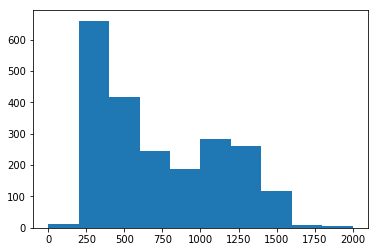

In [44]:
plt.hist(freqs.flatten());

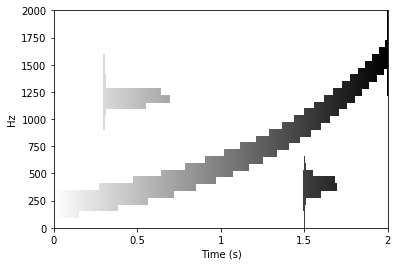

In [40]:
specshow(times, x_axis="s", y_axis="linear",
                         cmap="gray_r", sr=sr, hop_length=n_fft//4)

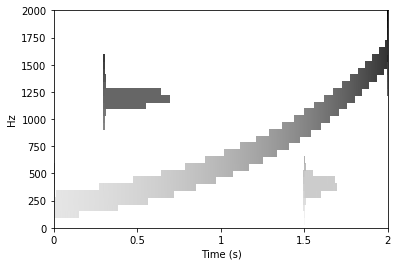

In [39]:
specshow(freqs, x_axis="s", y_axis="linear",
                         cmap="gray_r", sr=sr, hop_length=n_fft//4)

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


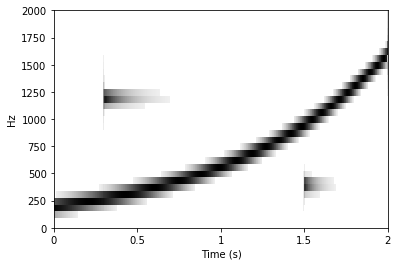

In [207]:
specshow((freqs>0)*(times >0)*mags, x_axis="s", y_axis="linear",
                         cmap="gray_r", sr=sr, hop_length=n_fft//4)

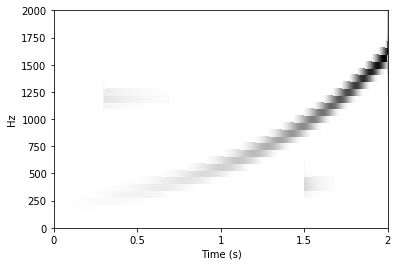

In [41]:
specshow(freqs*times*mags, x_axis="s", y_axis="linear",
                         cmap="gray_r", sr=sr, hop_length=n_fft//4)

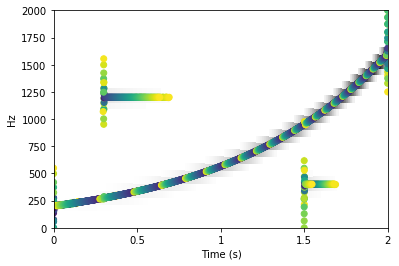

In [55]:
specshow(freqs*times*mags, x_axis="s", y_axis="linear",
                         cmap="gray_r", sr=sr, hop_length=n_fft//4)
plt.scatter(times, freqs, c=mags_db, alpha=1, cmap="viridis_r")

In [124]:
amin = 1e-10
n_fft = 512
sr = rate
y = data[:rate*5]
freqs, times, mags = librosa.reassigned_spectrogram(y=y, sr=sr, n_fft=n_fft)
mags_db = librosa.power_to_db(mags, amin=amin)
background = np.zeros_like(mags) - 10*np.log10(amin)

In [1]:
np.shape(freqs), np.shape(times), np.shape(mags)

NameError: name 'np' is not defined

In [ ]:
fig, axs = plt.subplots(nrows=2, figsize=(20,10))

specshow(mags_db, x_axis="s", y_axis="linear", sr=sr,
                         hop_length=n_fft//4, cmap="gray_r", ax = axs[0])
axs[0].set_title("Spectrogram")
plt.tick_params(axis='x', labelbottom=False)
plt.xlabel("")


specshow(background, x_axis="s", y_axis="linear",
                         cmap="gray_r", sr=sr, hop_length=n_fft//4, ax = axs[1])
plt.scatter(times, freqs, c=mags_db, alpha=0.05, cmap="gray_r")
plt.clim(10*np.log10(amin), np.max(mags_db))
axs[0].set_title("Reassigned spectrogram")

Text(0.5, 1.0, 'Reassigned spectrogram')

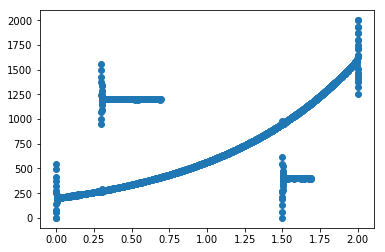

In [123]:
plt.scatter(times, freqs)

In [229]:
from tftb.processing import reassigned_spectrogram

In [232]:
??reassigned_spectrogram

In [231]:
s = reassigned_spectrogram(data[:rate*2])

MemoryError: 